## **Loading libraries**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate random signal

In [58]:
def generate_message(data_size):
  # randomly generate binary bit m
  m = np.array(np.random.randint(0, 2, size=data_size))
  return m

## Modulation (BPSK)

In [59]:
def modulation(c,SNR):
  # type your own code
  # assign the signal power based on the given SNR
  P = np.power(10,SNR/10)
  # implement the BPSK modulation and return the modulated signal x
  x = np.sqrt(P)*(2*c - 1)
  return x

## AWGN Channel

In [60]:
def AWGN_Channel(x):
  # assign the normalized noise
  n = np.random.normal(0,np.sqrt(1/2),len(x))
  # return the receive signal y by transmitted signal x plus the noise n
  y = x + n
  return y

# Hard decision

After we receive the signal, we first do the hard decision. If the signal is greater than the threshold, we say it is 1 and if the signal is smaller than the threshold it is 0.

In [61]:
def hard_decision(y):
  # type your own code
  # Set the hard decision threshold
  threshold = 0
  # Detect the signal and return the estimated message bit m_hat
  m_hat = (y >= threshold).astype(int)
  return m_hat

## Performance evaluation

We go through all signals to calculate the bit error rate.

P.S. output the number of elements of error bits

In [62]:
def calculate_error(m_hat,m):
  # type your own code
  # Find out all the error elements to get BER
  bit_err = np.sum(m_hat != m)
  return bit_err

## Main function

0 / 8
1 / 8
2 / 8
3 / 8
4 / 8
5 / 8
6 / 8
7 / 8
8 / 8


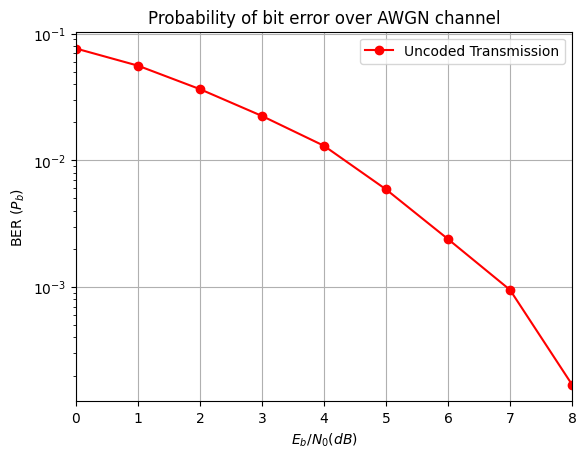

Bit Error Rate: [0.07629 0.05586 0.03645 0.02239 0.01302 0.0059  0.00239 0.00095 0.00017]


In [63]:
SNR_start = 0
SNR_end = 8
step_size = 1
SNR = np.arange(SNR_start,SNR_end+1,step_size)
length_SNR = len(SNR)
BER = np.zeros(length_SNR)
data_size = 100000

for i in range(len(SNR)):

  # Type your own code
  # Call the functions above
  m = generate_message(data_size)
  x = modulation(m,SNR[i])
  y = AWGN_Channel(x)
  m_hat = hard_decision(y)
  bit_err = calculate_error(m_hat,m)

  BER[i] = bit_err/data_size
  print(i,"/",len(SNR)-1)
  # Fig Plot
EbN0dBs = np.arange(start=SNR_start,stop=SNR_end+1,step=step_size)
fig1 = plt.figure()
plt.semilogy(EbN0dBs,BER,color='r',marker='o',linestyle='-',label='Uncoded Transmission')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BER ($P_b$)')
plt.title('Probability of bit error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Bit Error Rate:", BER)